## Pandas Workshop
### Part 1: ETL (Extract-Transform-Load)

It’s a generic process in which data is firstly acquired, then changed or processed and is finally loaded into data warehouse or databases or other files

#### 1. Import Pandas

In [1]:
import pandas as pd
pd.__version__

'1.4.3'

#### 2. Load the csv
- preview
- check the data types

In [2]:
df = pd.read_csv('houserent.csv')
df.head()

#i will later drop these columns:
#Posted On, Point of Contact

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [3]:
df.info()
#mindful of type "object" because ML models cannot use them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


### Part 2. EDA (Exploratory Data Analysis) ###

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

- use `describe()`
- plot some countplot, distplot, scatterplot, boxplot
- **try to tell me which features are promising to predict rent**
- try to use masking (as a practice)
- try `df['City'].value_counts()`
- try `.unique()`
- try `sns.pairplot(df)`; this will print all possible plots which take time; if your PC is slow, don't run...
 - try `sns.heatmap(df.corr(), annot=True)` but remind that it only does correlation for continuous features/labels
- try `plotly` and try `sunburst` - sankey diagram.....
- try to group size into very small (0), 3, very large (5)
  - can use median() as the middle pivot
  - can use median() - std() as the pivot between 0 and 1
- try to drop some rows, having abnormal numbers like Rent
  - df.drop([index(es)], axis=0, inplace=True)
  - axis = 0 means row; axis = 1 means columns
  - e.g., indexes ==> [5, 33, 22]  ==> use `np.where(df['Rent'] > 1000000000)`
- they try to look at the row - `df.iloc[rownum]`
    
**Last: for those who finished, share your top 3 features you think is good for predicting rent**

In [4]:
#gives you a one command easy statistical summary
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Note1: Rent is too high; must delete that row

### 2.1 Univariate analysis,
- Look at one variable,
- main tools - countplot and displot,
- countplot for discrete features,
- dis(t)plot for continuous features

In [5]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='BHK', ylabel='count'>

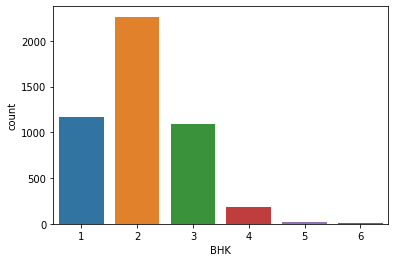

In [44]:
#countplot or displot?
#countplot for discrete features
#displot for continous features
sns.countplot(x = 'BHK', data = df)

#continuous means that there is a value between 1 and 2
#we can treat this as a discrete features

#what is the purpose of countplot?
#1. we want to understand the behavior (distribution) of our data
#2. we want to check any abnormalies

1


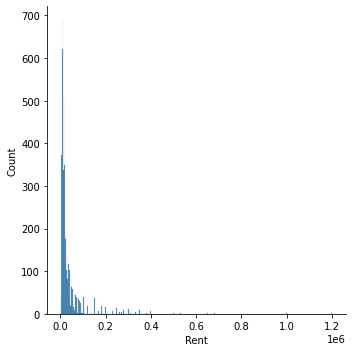

In [26]:
#let's plot Rent
#countplot or displot
df['Rent'].unique()

#in this case, Rent, theoretically can have 7500.2
#so Rent is considered Continuous

#i decide to cut 2.5
#use masking
cond0 = df['Rent'] > 2500000
print(df['Rent'][cond0].count())

cond1 = df['Rent'] < 2500000

sns.displot(df.Rent[cond1])

In [28]:
df['Rent'].min(), df['Rent'].max(), df['Rent'].mean(), df['Rent'].median(), df['Rent'].std()

(1200, 3500000, 34993.45132743363, 16000.0, 78106.4129373483)

In [29]:
import numpy as np

np.where(df['Rent'] > 1000000)

(array([1001, 1837]),)

In [32]:
df.iloc[1001]

Posted On                  2022-06-01
BHK                                 4
Rent                          1200000
Size                             5000
Floor                     4 out of 15
Area Type                 Carpet Area
Area Locality                    Juhu
City                           Mumbai
Furnishing Status      Semi-Furnished
Tenant Preferred     Bachelors/Family
Bathroom                          4.0
Point of Contact        Contact Agent
Name: 1001, dtype: object

In [33]:
#to delete 
#format: df.drop([indexes], axis=0, inplace=True)
#axis = 0 means rows, axis = 1 means columns

df.drop([1001, 1837], axis = 0, inplace=True)

In [34]:
np.where(df['Rent'] > 1000000)

(array([], dtype=int64),)

### 2.2 Multivariate analysis
- Look at two features/labels at the same time
- e.g., see how bathrooms affect Rent -> bivariate analysis
- e.g., see how size affect Rent
- usually, y is label, and x is any given feature
- Goal: which factor/features are somehow related to my label, i.e., Rent
- `boxplot` : discrete vs. continuous
- `scatterplot`: continuous vs. continuous

In [35]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [36]:
#if i want to see whether bathroom is related to Rent
#which plot to use?

df['Bathroom'].unique()

#theoretically, there is no 0.1 bathroom, so bathroom is discrete
#since Rent is continuous
#so we use boxplot

array([ 2.,  1., nan,  3.,  5.,  4.,  6.,  7., 10.])

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

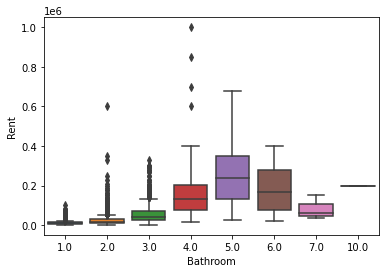

In [37]:
sns.boxplot(x = df['Bathroom'], y = df['Rent'])

Is there any relationship between bathroom and Rent?

Note 2:  Bathroom is good feature

In [38]:
df['City'].value_counts()

Mumbai       971
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Rent'>

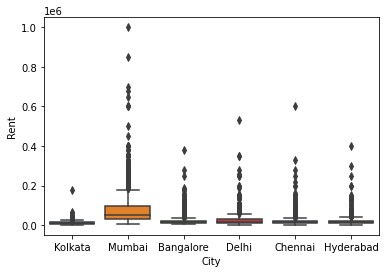

In [39]:
sns.boxplot(x = df['City'], y = df['Rent'])

In [40]:
#Note 2: if you want to use City as feature, you may want to convert
#Mumbai and non-Mumbai

In [41]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

<AxesSubplot:xlabel='Size', ylabel='Rent'>

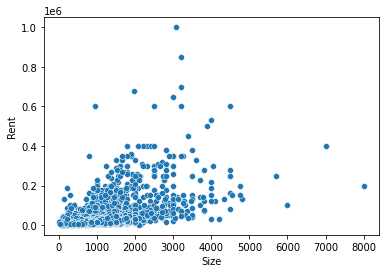

In [42]:
sns.scatterplot(x = df['Size'], y = df['Rent'])

<AxesSubplot:>

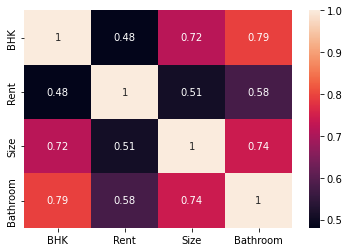

In [45]:
#since this is tricky, maybe let's try heatmap
sns.heatmap(df.corr(), annot=True)  #note that this is only between continuous values

In [46]:
#one more thing you have to be careful
#if two features (NOT labels) have very high correlation, beware
#features MUST NOT have high correlation; we always assume they are independent
#if you have two very correlated features, you will fool the model

In [ ]:
#summary: size, bathroom, bhk - let's say these are best three
#but beware: chaky did not comprehensively look at the data

In [47]:
#let's try create new column called categorical_size
#which 1 means small, 2 means medium, 3 means big
#this is just for exercise
#it's very commonn in data science so I want to practice

In [48]:
df['Size'].mean(), df['Size'].median(), df['Size'].std()

(966.3176644182125, 850.0, 631.2346642955634)

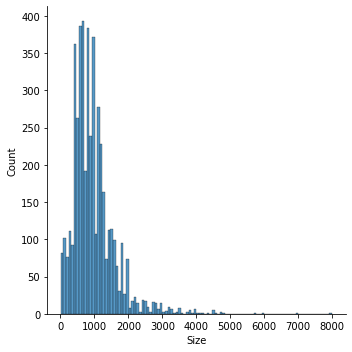

In [49]:
sns.displot(df.Size)

In [50]:
firstpivot = df['Size'].median() - df['Size'].std()
firstpivot

218.76533570443655

In [51]:
secondpivot = df['Size'].median() + df['Size'].std()
secondpivot

1481.2346642955636

In [52]:
#group 1: < 218.76....
cond1 = df.Size < firstpivot
cond1  #basically a list of True and False (can be used to select indexes)

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Name: Size, Length: 4744, dtype: bool

In [53]:
cond2 = (df.Size >= firstpivot) & (df.Size <= secondpivot)
cond2

0        True
1        True
2        True
3        True
4        True
        ...  
4741     True
4742    False
4743    False
4744    False
4745     True
Name: Size, Length: 4744, dtype: bool

In [54]:
cond3 = df.Size > secondpivot
cond3

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742     True
4743     True
4744     True
4745    False
Name: Size, Length: 4744, dtype: bool

In [55]:
#set all rows meeting 
# cond1 to 1
# cond2 to 2
# cond3 to 3

#format: df.col[cond1] = 1
#create the column, and just set it to 1
df['cat_size'] = 1

In [57]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'cat_size'],
      dtype='object')

In [58]:
#format: df.loc[row, column]
df.loc[cond1, 'cat_size'] = 1

In [63]:
df.cat_size.unique()

array([2, 3, 1])

/root/projects/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat_size', ylabel='count'>

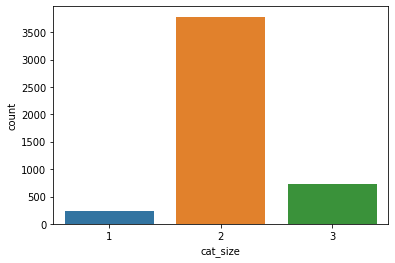

In [64]:
sns.countplot(df['cat_size'])

<AxesSubplot:xlabel='cat_size', ylabel='Rent'>

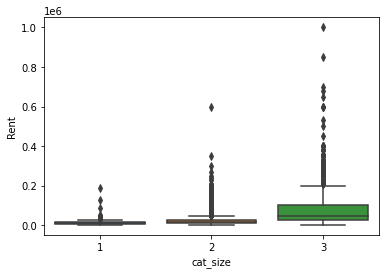

In [65]:
#try to plot and see whether categorical size has an effect with Rent

#which plot i use: boxplot or scatterplot?

sns.boxplot(x = df['cat_size'], y = df['Rent'])

#the concept in which we create new features using existing features
#are called "feature engineering"

#maybe the idea is try to separate the category even more
#very small, small, medium, big, very big

#conclusion: i hope that using the continuous Size, can be better
#if my model is smart

In [66]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [67]:
#you need to convert this to integers for machine learning
#1. label encoding 
#2. one-hot encoding

#since we have three categories, we gonna use one-hot encoding
#pd.get_dummies
#   it will take the value, and use it as column

#last time, the command you use is LabelEncoder()

In [ ]:
#conclusion of EDA:

#1. we remove some outliers from Rent
#2. we found bathroom, size, and bhk to be promising features
#3. we learn how to group and perform feature engineering

#### Part 3. Feature Extraction / Selection

- you have to now select your X and y
- once you select, please do train_test_split

Note: the reason why I do feature extraction before preprocessing, is to prevent data leakage

In [69]:
X = df[ ['Size', 'Bathroom', 'BHK']  ] #if not, you will NOT get a shape of (m, n)
y = df['Rent'] #shape must be (m, )

#this is to make sure my X is shape (m, n)
#where m is number of rows
#and n is number of columns
assert X.shape[0] > 0
assert X.shape[1] > 0

assert y.shape[0] > 0
assert y.ndim == 1

In [71]:
from sklearn.model_selection import train_test_split

#random state: you can choose whatever number you want
#but this will ensure today or tomorrow, you will ALWAYS get the same split
#for the same random state
#so we can compare our results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=999)

#can try to write some assert test

In [72]:
assert X_train.shape[0] == int(X.shape[0] * 0.7)
#i am not gonna do all!

In [73]:
#one last thing to do, i.e., ensure no datatype "object"
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 4292 to 4446
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      3320 non-null   int64  
 1   Bathroom  3316 non-null   float64
 2   BHK       3320 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 103.8 KB
<class 'pandas.core.series.Series'>
Int64Index: 3320 entries, 4292 to 4446
Series name: Rent
Non-Null Count  Dtype
--------------  -----
3320 non-null   int64
dtypes: int64(1)
memory usage: 51.9 KB


#### Part 4: Cleaning / Preprocessing

- We always preprocess AFTER splitting, to prevent data leakage

1. Fill the missing values if any
2. Standardize the data!

In [76]:
data = np.array([1, 2, 3, 4, 6])  #assume missing data in 5

# data.mean()
# np.median(data)

# #replace the missing value
# data = np.array([1, 2, 3, 4, 3.2, 6])


# mean = data.mean()
# std  = data.std()
# for i, num in enumerate(data):
#     data[i] = (data[i] - mean) / std
    
# data

#++++Note: you can also use broadcasting (much elegant):  data = (data - data.mean()) / data.std()

data = (data - data.mean()) / data.std()

data.mean(), np.median(data)

(-1.3322676295501878e-16, -0.11624763874381938)

#### 4.1 Filling with missing values

In [77]:
X_train.isna().sum()

Size        0
Bathroom    4
BHK         0
dtype: int64

In [82]:
X_test.isna().sum()

Size        0
Bathroom    3
BHK         0
dtype: int64

In [79]:
y_train.isna().sum()

0

In [80]:
y_test.isna().sum()

0

In [83]:
X_train['Bathroom'].value_counts()

# Highest number of samples have Bathroom = 2
# So select this to fill null

2.0     1626
1.0     1025
3.0      500
4.0      110
5.0       44
6.0        9
10.0       1
7.0        1
Name: Bathroom, dtype: int64

In [84]:
#to fix the bathroom

#1. plot the distribution / count
X_train['Bathroom'].value_counts()

#2. show the median, or the mean if continuous values
#2. show the majority if discrete values
    #actually, you can fill such that the ratio is maintained

#3. fillna
X_train['Bathroom'].fillna(2.0, inplace=True)

In [85]:
X_train['Bathroom'].isna().sum()

0

In [86]:
#you have fillna for test
#what to fill???
#you fill the testing set with the statistics of the training set
X_test['Bathroom'].fillna(2.0, inplace=True)

X_test['Bathroom'].isna().sum()

0

#### 4.2 Standardizing

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
#1. create the object
sc = StandardScaler()

#2. fit and transform the training set
X_train = sc.fit_transform(X_train)

#3. transform the testing set
X_test  = sc.transform(X_test)

In [89]:
X_train[:, 0].std(), X_train[:, 1].std(), X_train[:, 2].std()

(0.9999999999999999, 1.0, 1.0)

In [93]:
X_train[:, 0].mean(), X_train[:, 1].mean(), X_train[:, 2].mean()

(7.517413733004072e-17, -1.1128982608290727e-16, -8.614260576609648e-17)

In [90]:
X_test[:, 0].std(), X_test[:, 1].std(), X_test[:, 2].std()

(1.008823326038675, 1.0002554196921853, 1.0038160526618698)